# Оптимизация, подгонка данных и численные методы решения уравнений

Пакет ```scipy.optimize``` предоставляет реализации множества общеизвестных алгоритмов для минимизации многомерных функций (с  дополнительными ограничениями или без них), для подгонки данных методом наименьших квадратов и для решения (определения корней) уравнений со многими неизвестными. В этом разделе приведен общий обзор наиболее важных доступных вариантов реализации, но следует всегда помнить о том, что наилучший выбор алгоритма будет зависеть от конкретной анализируемой функции. Для произвольной функции нет никакой уверенности в том, что конкретный метод будет сходящимся к требуемому минимуму (или корню и т. п.) или что сходимость будет обеспечена достаточно быстро. Некоторые алгоритмы подходят в большей степени для конкретных функций, чем для других, поэтому чем больше известно об анализируемой функции, тем лучше. Библиотеку SciPy можно сконфигурировать так, чтобы выводилось предупреждающее сообщение при критических сбоях конкретного алгоритма, и это сообщение, как правило, может помочь при анализе возникшей проблемы.
Более того, возвращаемый результат часто зависит от исходной предпосылки, передаваемой алгоритму, – рассмотрим двумерную функцию как пейзаж с несколькими долинами, разделенными крутыми горными хребтами: начальная предпосылка, размещенная в  одной из долин, вероятно, приведет большинство алгоритмов к блужданию по склону и обнаружению минимума в этой
долине (даже если это не глобальный минимум) без необходимости взбираться
на горные хребты. Точно так же вы можете ожидать (но без каких-либо гарантий), что большинство численных методов решения уравнений возвращают корень, «ближайший» к изначальной предпосылке.

## Минимизация

Программы оптимизации библиотеки ```SciPy``` минимизируют функцию одной или нескольких переменных ```f(x1, x2,…, xn)```. Для поиска максимума определяется минимум функции ```−f(x1, x2, …, xn)```.

Некоторые алгоритмы минимизации требуют только саму анализируемую
функцию, для других необходима первая производная этой функции по каждой переменной (частные производные) в  массиве, известном как матрица
Якоби (якобиан):

    ```J(f) = (∂f/∂x1, ∂f/∂x2, …, ∂f/∂xn).```
    
Некоторые алгоритмы пытаются оценить матрицу Якоби численными методами, если ее невозможно представить как отдельную функцию.

Более того, для некоторых интеллектуальных алгоритмов оптимизации требуется информация о  вторых (частных) производных анализируемой функции в виде симметричной матрицы значений, называемой матрицей Гессе (гессианом):

![](images/image1.png)


Матрица Якоби представляет локальный градиент функции нескольких переменных, а матрица Гессе представляет локальный радиус кривизны.

## Минимизация без ограничений

Обобщенный алгоритм минимизации для скалярной функции нескольких переменных ```scipy.optimize.minimize``` принимает два обязательных аргумента:


minimize(fun, x0, ...)


Первый аргумент – объект функции fun для вычисления минимизируемой функции: эта функция должна принимать массив значений x, определяющий точки, в которых должны выполняться вычисления (x1, x2,…, xn), с последующими любыми требуемыми аргументами. Второй обязательный аргумент x0 – это массив значений, представляющих начальные предпосылки, с которых алгоритм минимизации должен начать работу.

В этом разделе демонстрируется использование метода ```minimize``` с функцией Химмельблау, простой функцией от двух переменных с некоторыми сложными свойствами, которые делают ее вполне подходящей тестовой функцией для алгоритмов оптимизации. Функция Химмельблау имеет следующий вид:

f(x,y) = (x^2 + y − 11)^2 + (x + y^2 − 7)^2.

Область ```−5 ≤ x ≤ 5```, ```−5 ≤ y ≤ 5``` содержит один локальный максимум

f(−0.270845, −0.923039) = 181.617

(хотя функция «взбирается выше по склону» за пределами этой области).В этой
же области существуют четыре минимума:

 f(3,2) = 0,
 f(−2.805118, 3.131312) = 0,
 f(−3.779310, −3.283186) = 0,
 f(3.584428, −1.848126) = 0
 
 и четыре седловые точки (точки перегиба). На  рис.1 показан контурный
график данной функции.

![](images/image2.png)

**Рис. 1**. Контурный график (диаграмма линий уровня) функции Химмельблау

Функцию Химмельблау можно определить на Python обычным способом:

```
In [x]: def f(X):
...: x, y = X
...: return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

```

где для лучшего понимания массив ```X```, содержащий ```(x1, x2)```, распакован в именованные переменные ```x1 ≡ x``` и ```x2 ≡ y```.

Для поиска минимума вызывается метод ```minimize``` с некоторыми начальными предпосылками, например ```(x,y) = (0,0)```:

In [199]:
from scipy.optimize import minimize

In [200]:
def f(X):
    x, y = X
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

minimize(f, (0, 0))

      fun: 1.3782237540369274e-13
 hess_inv: array([[ 0.01578229, -0.0094806 ],
       [-0.0094806 ,  0.03494937]])
      jac: array([-3.95019453e-06, -1.19075395e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 10
     njev: 16
   status: 0
  success: True
        x: array([2.99999994, 1.99999999])

Метод ```minimize``` возвращает объект типа словарь с информацией о минимизации. Важные поля словаря описаны в табл. 1: если минимизация завершилась успешно, то минимум передается как ```x``` в этом объекте – здесь получена сходимость, близкая к действительному минимуму ```f(3,2) = 0```.

**Таблица 1**. Словарь, содержащий информацию о минимизации, возвращаемый методом
```scipy.optimize.minimize```


|Ключи|Описание|
|:----|:-------|
|success|Логическое значение, сообщающее, была минимизация успешной или нет|
|x|Если минимизация успешна, то содержит решение: значения (x1, x2, …, xn), в которых найден минимум функции. Если алгоритм минимизации завершился неудачно, то x содержит точку аварийного останова|
|fun |Если минимизация успешна, то содержит значение функции в точке минимума, определенной как x|
|message|Строка, описывающая результат минимизации|
|jac|Значение матрицы Якоби: если минимизация успешна, то значения в этом массиве должны быть близкими к нулю|
|hess, hess_inv|Матрица Гессе и обратная ей матрица (если использовалась)|
|nfev, njev, nhev|Количество операций вычисления анализируемой функции, ее якобиана и гессиана|




**Таблица 2**. Некоторые из методов оптимизации, используемые методом ```scipy.optimize.
minimize```

|Значение аргумента method|Описание|
|:------------------------|:-------|
|BFGS |Алгоритм BFGS (Broyden-Fletcher-Goldfarb-Shanno), принятый по умолчанию для минимизации без ограничений или граничных условий|
|Nelder-Mead|Алгоритм Нелдера–Мида, также известный как симплекс-метод (спуска) или метод деформируемого многогранника (амебы). Не требует производных|
|CG|Метод сопряженных градиентов|
|Powell|Метод Пауэлла (для этого алгоритма не требуются производные)|
|dogleg|Ломано-линейный алгоритм в доверительной области (неограниченная минимизация). Требуются матрицы Якоби и Гессе (которые обязательно должны быть положительно определенными)|
|TNC|Усеченный алгоритм Ньютона для минимизации с граничными условиями|
|l-bfgs-b |Минимизация с ограничениями и граничными условиями с использованием алгоритма L-BFGS-B|
|slsqp |Метод минимизации «последовательное программирование методом наименьших квадратов» (sequential least-squares programming) с граничными условиями и ограничениями по равенству и неравенству|
|cobyla |Метод «оптимизации с ограничениями с использованием линейной аппроксимации» (constrained optimization by linear approximation) для минимизации с ограничениями|



Алгоритм, используемый методом ```minimize```, определяется с помощью передаваемой в аргументе ```method``` строки, допустимые варианты которой приведены в табл. 3. Алгоритм, применяемый по умолчанию, BFGS – эффективный квазиньютоновский метод, который может аппроксимировать матрицу Якоби, если она не предоставлена и не используется матрица Гессе. Но этот алгоритм испытывает затруднения при поиске минимума функции Химмельблау:

In [201]:
 mf = lambda X: -f(X) # Для поиска максимума минимизируется функция -f(x, y).

In [202]:
minimize(mf, (0.1, -0.2))

      fun: -8122685219740.447
 hess_inv: array([[0.03043408, 0.00669823],
       [0.00669823, 0.00147411]])
      jac: array([-3.85738342e+09,  1.75265546e+10])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 351
      nit: 2
     njev: 113
   status: 2
  success: False
        x: array([  988.07169246, -1636.22149234])

Начиная с (0.1, −0.2) алгоритм BFGS «сбивается с курса» на одном из крутых
склонов функции Химмельблау, и сходимость не обеспечивается. К сожалению, в этом случае алгоритм не может определить критическую ошибку и возвращает значение True в флаге success (иногда, но не во всех случаях может выводиться сообщение об ошибке: ‘Desired error not necessarily achieved due to precision loss.’ [‘Требуемое значение погрешности не гарантируется изза потери точности.’] – это зависит от настройки уровня погрешности в конкретной системе). В действительности, чтобы обеспечить успешное завершение процесса минимизации, необходимо начать достаточно близко к точке
максимума:


In [203]:
minimize(mf, (-0.2,-1))

      fun: -181.61652152258267
 hess_inv: array([[ 0.02312334, -0.0065379 ],
       [-0.0065379 ,  0.06119262]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([-0.27084461, -0.9230386 ])

Разумеется, это не очень помогает, если заранее неизвестно, где находится максимум. Попробуем применить другой алгоритм минимизации и  начнем с произвольно выбранной предпосылки (0,0):

In [204]:
minimize(mf, (0, 0), method='Nelder-Mead')

 final_simplex: (array([[-0.27086815, -0.92300745],
       [-0.27082188, -0.92309634],
       [-0.27084492, -0.92296765]]), array([-181.61652151, -181.61652149, -181.61652148]))
           fun: -181.61652150549165
       message: 'Optimization terminated successfully.'
          nfev: 115
           nit: 59
        status: 0
       success: True
             x: array([-0.27086815, -0.92300745])

Алгоритм Нелдера–Мида – это симплекс-метод, который не требует вычисления или оценки производных функции, так что он не пытается взбираться на крутые склоны функции. Тем не менее этот алгоритм выполняет вычисления по 115 функциям для обеспечения сходимости к локальному максимуму.

В качестве последнего примера рассмотрим метод dogleg, который требует передачи в метод ```minimize``` функций, вычисляющих матрицы Якоби и Гессе.

Для функции Химмельблау необходимые производные имеют простые аналитические формы:

```
∂f/∂x = 4x(x2
 + y − 11) + 2(x + y2 − 7),
∂f/∂y = 2(x2
 + y − 11) + 4y(x + y2 − 7),
∂2
f/∂x2 = 12x2 + 4y − 42,
∂2
f/∂y2 = 12y2 + 4x − 26,
∂2
f/∂y∂x = ∂2
f/∂x∂y = 4x + 4y

```

Для вычисления матриц Якоби и Гессе можно написать следующий код:

In [205]:
import numpy as np
def df(X):
    x, y = X
    f1, f2 = x**2 + y - 11, x + y**2 - 7
    dfdx = 4*x*f1 + 2*f2
    dfdy = 2*f1 + 4*y*f2
    return np.array([dfdx, dfdy])

In [206]:
def ddf(X):
    x, y = X
    d2fdx2 = 12*x**2 + 4*y - 42
    d2fdy2 = 12*y**2 + 4*x - 26
    d2fdxdy = 4*(x + y)
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

In [207]:
mdf = lambda X: -df(X)

In [208]:
mddf = lambda X: -ddf(X)

Обратите внимание: как и для самой функции, при поиске максимума
необходимо использовать отрицательные матрицы Якоби и  Гессе: они
определены как лямбда-функции ```mdf``` и ```mddf```.

In [209]:
 minimize(mf, (0, 0), jac=mdf, hess=mddf, method='dogleg')

     fun: -181.6165215225827
    hess: array([[44.81187272,  4.77553259],
       [ 4.77553259, 16.85937624]])
     jac: array([-1.26922473e-10,  1.23684885e-09])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 4
     nit: 4
    njev: 5
  status: 0
 success: True
       x: array([-0.27084459, -0.92303856])

Алгоритм успешно сходится в точке локального максимума после пяти операций вычисления функции, пяти операций вычисления матрицы Якоби и четырех операций вычисления матрицы Гессе.

## Оптимизация с ограничениями

Иногда необходимо найти максимум или минимум объекта функции с одним
или несколькими ограничениями. Чтобы воспользоваться описанным выше
методом в качестве примера, можно попытаться найти один минимум функции ```f(x,y)```, который удовлетворяет условию ```x > 0```, ```y > 0```, или значение минимума
функции на прямой ```x = y```

Алгоритмы ```l-bfgs-b```, ```tnc``` и ```slsqp``` поддерживают аргумент ```bounds``` для передачи в метод ```minimize```. Значение аргумента ```bounds``` – это последовательность
кортежей, каждый из которых содержит пары ```(min, max)``` для каждой переменной функции, определяющие границы минимизации для соответствующей переменной. Если в каком-либо направлении не существует ограничений, то используется значение ```None```.
Например, если выполняется попытка найти минимум функции ```f(x,y)```, начиная с ```(−1/2, −1/2)``` без определения каких-либо границ, то метод ```slsqp``` обеспечивает сходимость (почти точную) к минимуму в точке ```(−2.805118, 3.131312)```:

In [210]:
minimize(f, (-0.5,-0.5), method='slsqp')

     fun: 4.0198726971069946e-07
     jac: array([-0.00721077,  0.00037714])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([-2.80522924,  3.131319  ])

Чтобы оставаться в квадранте ```x < 0```, ```y < 0```, необходимо установить значения
bounds без минимальных границ по ```x``` и ```y``` и максимальные границы ```x = 0``` и ```y = 0```:

In [211]:
xbounds = (None, 0)

In [212]:
ybounds = (None, 0)

In [213]:
bounds = (xbounds, ybounds)

In [214]:
minimize(f, (-0.5, -0.5), bounds=bounds, method='slsqp')

     fun: 4.115667606325133e-08
     jac: array([-0.00283595, -0.00034243])
 message: 'Optimization terminated successfully'
    nfev: 39
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([-3.77933774, -3.28319868])

Предположим, что необходимо найти точки экстремума функции Химмельблау, которые также соответствуют условию ```x = y``` (т. е. лежат на диагонали графика, изображенного на рис 2). Из методов минимизации, перечисленных в табл. 2, два – ```cobyla``` и ```slsqp``` – позволяют применять ограничения, поэтому необходимо воспользоваться одним из них.
Ограничения определяются как аргумент ```constrains``` для метода ```minimize``` в виде
последовательностисловарей,определяющих строковые ключи: 'type' – типограничения и 'fun' – вызываемый объект, реализующий это ограничение. Значением 'type' может быть 'eq' или 'ineq' для ограничения, основанного на равенстве (например, ```x = y```) или на неравенстве (например, ```x > 2y − 1```). Обратите особое внимание: метод ```cobyla``` не поддерживает ограничения, основанные на равенстве.

Функция ограничения, основанного на равенстве, должна возвращать ноль, если ограничение соблюдено, а функция ограничения, основанного на неравенстве, должна возвращать неотрицательное значение, если ограничение соблюдено.

Для поиска минимума функции ```f(x,y)``` с ограничением ```x = y``` можно воспользоваться методом ```slsqp``` с функцией ограничения, основанного на равенстве,
возвращающей ```x − y:

In [215]:
con = {'type': 'eq', 'fun': lambda X: X[0] - X[1]}

In [216]:
minimize(f, (0, 0), constraints=con, method='slsqp')

     fun: 8.000000000716087
     jac: array([-16.33084416,  16.33130538])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.54138438, 2.54138438])

Метод сходится к  одному из минимумов (существует и другой минимум,
который можно найти, начав, например, с (−2, −2). А как насчет максимума?

In [217]:
minimize(mf, (0, 0), constraints=con, method='slsqp')

C:\Users\user\AppData\Local\Temp\ipykernel_536\2614586905.py:3: RuntimeWarning: overflow encountered in double_scalars
  return (x**2 + y - 11)**2 + (x + y**2 - 7)**2
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


     fun: nan
     jac: array([nan, nan])
 message: 'Iteration limit reached'
    nfev: 1335
     nit: 100
    njev: 100
  status: 9
 success: False
       x: array([nan, nan])

В этом случае поиск заканчивается неудачно  – алгоритм пытается «взобраться на крутой склон долины». Более подходящим является выбор алгоритма ```cobyla```, но этот алгоритм не поддерживает ограничения, основанные на равенстве, поэтому придется сформировать требуемое ограничение с помощью пары неравенств: ```x = y```, если не выполняются оба неравенства ```x > y``` и ```x < y```:

In [218]:
 con1 = {'type': 'ineq', 'fun': lambda X: X[0] - X[1]}

In [219]:
 con2 = {'type': 'ineq', 'fun': lambda X: X[1] - X[0]}

In [220]:
 minimize(mf, (0, 0), constraints=(con1, con2), method='cobyla')

     fun: -179.12499987327624
   maxcv: -0.0
 message: 'Optimization terminated successfully.'
    nfev: 34
  status: 1
 success: True
       x: array([-0.49994148, -0.49994148])

Здесь функция ограничения, определенная в ```con1```, возвращает неотрицательное значение, если ```x > y```, а функция, определенная в ```con2```, возвращает неотрицательное значение, если ```x < y```. Единственный вариант выполнения этих обоих ограничений – равенство ```x = y```.

## Минимизация функции одной переменной

Если минимизируемая функция является одномерной (т. е. зависит только от
одной скалярной переменной), то для нее предлагается более быстрый алгоритм ```scipy.optimize.minimize_scalar```. Чтобы просто получить минимум, эту функцию можно вызвать с  аргументом ```method='brent'```, который определяет использование реализации метода Брента для нахождения минимума. В идеальном случае сначала нужно установить интервал поиска минимума, предоставив для ```x``` значения ```(a, b, c)``` такие, что ```f(a) > f(b)``` и ```f(c) > f(b)```. Это можно сделать с помощью аргумента ```bracket```, в котором передается кортеж ```(a, b, c)```. Если это невозможно или слишком сложно, то передается интервал из двух значений ```x```, в  котором начинается поиск ограниченной области минимума (в  направлении «спуска», т.  е. убывания функции). Если значение аргумента
```bracket``` не задано,то поиск ограниченной области минимума начинается с интервала ```(0,1)```. На рис. 1 приведен пример графика многочлена с  двумя минимумами
и одним максимумом.


![](images/image3.png)
**Рис. 3**. График многочлена f(x) = x4 − 3x3− 24x2 + 28x + 48

Без заданного значения аргумента ```bracket``` метод ```minimize_scalar``` обеспечивает сходимость к  минимуму в точке ```−2.841``` для функции, показанной на рис. 2:

In [221]:
Polynomial = np.polynomial.Polynomial
from scipy.optimize import minimize_scalar
f = Polynomial( (48., 28., -24., -3., 1.))
minimize_scalar(f)

     fun: -91.32163915433344
    nfev: 15
     nit: 10
 success: True
       x: -2.841044326595826

Если определить ограниченную область поиска другого минимума, передавая значения ```(a, b, c) = (3, 4, 6)```, которые, как можно видеть на рис. 2, соответствуют условию ```f(a) > f(b) < f(c)```, то алгоритм обеспечивает сходимость в точке ```4.549```:


In [222]:
 minimize_scalar(f, bracket=(3, 4, 6))

     fun: -175.45563549487974
    nfev: 14
     nit: 10
 success: True
       x: 4.549468364257193

Наконец, для поиска максимума метод ```minimize_scalar``` вызывается с передачей в него функции ```−f(x)```. На этот раз инициализируется поиск в ограниченной области минимума функции ```−f(x)``` с помощью пары значений ```(−1, 0)```:

In [223]:
minimize_scalar(-f, bracket=(-1, 0))

     fun: -55.734305899213226
    nfev: 12
     nit: 8
 success: True
       x: 0.5415759589734416

## Нелинейная подгонка методом наименьших квадратов

В библиотеке ```SciPy``` обобщенной программой нелинейной подгонки методом
наименьших квадратов является ```scipy.optimize.leastsq```, основная сигнатура
вызова которой:

Эта программа пытается подогнать последовательность точек данных y к моделируемой функции ```f```, которая зависит от одного или нескольких параметров подгонки. В метод ```leastsq``` передается соответствующий объект функции ```func```, которая возвращает разность между ```y``` и ```f``` (невязки). Для метода ```leastsq``` также требуется начальная предпосылка для подгоняемых параметров ```x0```. Если для функции ```func``` необходимы какие-либо другие аргументы (обычно массив данных ```y``` и одна или несколько независимых переменных), то они передаются в последовательности ```args```. Например, рассмотрим подгонку искусственно зашумленной затухающей функции косинуса ```f(t) = Ae−t/T cos 2πvt``` (см. рис. 4).

In [224]:
import numpy as np

In [225]:
import matplotlib.pyplot as plt


In [226]:
A, freq, tau = 10, 4, 0.5

In [227]:
def f(t, A, freq, tau):
    return A * np.exp(-t/tau) * np.cos(2*np.pi * freq * t)

In [228]:
tmax, dt = 1, 0.01

In [229]:
t = np.arange(0, tmax, dt)

In [230]:
yexact = f(t, A, freq, tau)

In [231]:
y = yexact + np.random.randn(len(yexact))*2

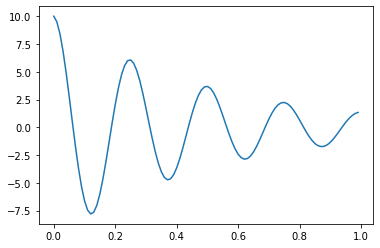

In [232]:
plt.plot(t, yexact)

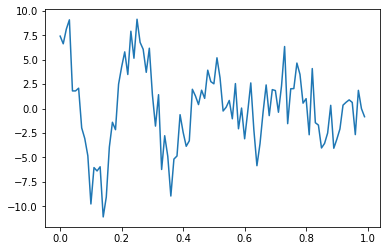

In [233]:
plt.plot(t, y)

Для подгонки этого зашумленного набора данных ```y``` к параметрам ```A```, ```freq```
и ```tau``` (будем считать, что нам они неизвестны) сначала определим необходимую функцию ```residuals```:


In [234]:
def residuals(p, y, t):
    A, freq, tau = p
    return y - f(t, A, freq, tau)

Первый аргумент – последовательность параметров ```p```, которые для лучшего понимания распаковываются в именованные переменные. Необходимые дополнительные аргументы: набор точек данных ```y``` и независимая переменная ```t```. Теперь определим для параметров некоторые начальные предпосылки, которые не должны быть слишком необдуманными, и вызовем метод ```leastsq```:

In [235]:
from scipy.optimize import leastsq

In [236]:
p0 = 5, 5, 1

In [237]:
plsq = leastsq(residuals, p0, args=(y, t))

In [238]:
plsq[0]

array([9.84212553, 4.01942949, 0.52405089])

Как и другие программы оптимизации из библиотеки ```SciPy```, метод ```leastsq``` можно настроить так, чтобы он возвращал больше информации о выполненной работе, но здесь выводятся только решения (параметры наилучшей подгонки), которые всегда являются первым элементом в кортеже ```plsq```.

Действительные значения ```A```, ```freq```, ```tau = 10, 4, 0.5```, поэтому с учетом шума
в данных результат вполне приемлемый. Соответствующее графическое отображение:

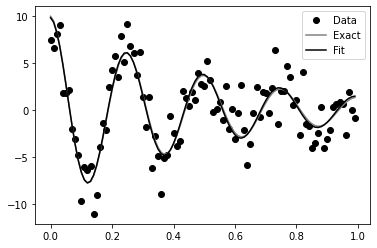

In [239]:
plt.plot(t, y, 'o', c='k', label='Data')
plt.plot(t, yexact, c='gray', label='Exact')
pfit = plsq[0]
plt.plot(t, f(t, *pfit), c='k', label='Fit')
plt.legend()
plt.show()

**Рис. 3**. Нелинейная подгонка методом наименьших квадратов для зашумленной
затухающей функции косинуса

В метод ```leastsq``` также можно передать матрицу Якоби, если она известна,
как показано в примере 3.

**Пример  1**. Здесь рассматривается зашумленная последовательность точек данных, которые необходимо подогнать к эллипсу. Уравнение эллипса можно записать как нелинейную функцию от угла ```θ``` ```(0 ≤ θ ≤ 2π)```, который зависит от параметров ```a``` (главная полуось эллипса) и ```e``` (эксцентриситет эллипса):


```r(θ; a, e) = a(1 − e2) / (1 − e cos θ)```


Для подгонки последовательности точек данных ```(θ,r)``` к этой функции сначала напишем код функции Python, принимающей два аргумента: независимая переменная ```theta``` и кортеж параметров ```p = (a, e)```. Необходимая для минимизации функция определяет разность между этой моделируемой функцией и данными ```r```, определенную как метод ```residuals```:


plsq = leastsq(residuals, p0, args=(r, theta))

Но, если это вообще возможно, лучше также передать матрицу Якоби (первая производная функции подгонки с учетом подгоняемых параметров). Эти формулы без затруднений вычисляются и реализуются:

∂f/∂a = (1 − e2) / (1 − e cos θ),

∂f/∂e = a[cos θ(1 + e2) − 2e] / (1 − e cos θ)2.

Но функция, необходимая для минимизации, представляет собой функцию невязок ```r − f```, поэтому требуются отрицательные значения этих производных.

В листинге 3 приведен работающий код, а на рис. 3 – результат подгонки.

**Листинг 1**. Нелинейная подгонка методом наименьших квадратов к эллипсу

In [240]:
# eg8-leastsq.py
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
def f(theta, p):
    a, e = p
    return a * (1 - e**2)/(1 - e*np.cos(theta))
# Данные для подгонки.
theta = np.array([0.0000, 0.4488, 0.8976, 1.3464, 1.7952, 2.2440, 2.6928,
 3.1416, 3.5904, 4.0392, 4.4880, 4.9368, 5.3856, 5.8344, 6.2832])
r = np.array([4.6073, 2.8383, 1.0795, 0.8545, 0.5177, 0.3130, 0.0945, 0.4303,
 0.3165, 0.4654, 0.5159, 0.7807, 1.2683, 2.5384, 4.7271])
def residuals(p, r, theta):
    """ Return the observed - calculated residuals using f(theta , p). """
    """ Возвращает невязки значений наблюдаемое-вычисляемое с использованием f(theta, p).ipynb_checkpoints/"""
    return r - f(theta, p)
def jac(p, r, theta):
    """ Calculate and return the Jacobian of residuals. """
    """ Вычисление и возвращение матрицы Якоби невязок. """
    a, e = p
    da = (1 - e**2)/(1 - e*np.cos(theta))
    de = a * (np.cos(theta) * (1 + e**2) - 2*e) / (1 - e*np.cos(theta))**2
    return -da, -de

# Начальные предпосылки для a, e.
p0 = (1, 0.5)
plsq = optimize.leastsq(residuals, p0, Dfun=jac, args=(r, theta), col_deriv=True)
print(plsq)

(array([2.47915456, 0.87929513]), 1)


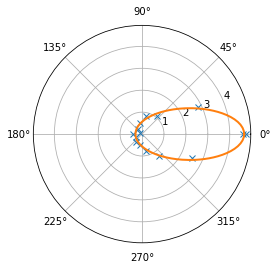

In [241]:
plt.polar(theta, r, 'x')
theta_grid = np.linspace(0, 2*np.pi, 200)
plt.polar(theta_grid, f(theta_grid, plsq[0]), lw=2)
plt.show()

В библиотеку ```SciPy``` также включен метод подбора (аппроксимации) кривой ```scipy.optimize.curve_fit```, которая может напрямую подгонять данные к функции (без дополнительной функции, вычисляющей невязки) и поддерживает подгонку взвешенным (с  весовыми коэффициентами) методом наименьших квадратов. Сигнатура вызова этого метода

где ```f``` – функция, к которой подгоняются данные ```(xdata, ydata)```. Аргумент ```p0``` – это начальная предпосылка для параметров. Если определен аргумент ```sigma```, то
в немпередаются весовые коэффициентыдля значенийydata.Еслидля аргумента ```absolute_sigma``` задано значение True, то значения ```sigma``` интерпретируются
как стандартное (среднеквадратическое) отклонение ошибки (т. е. абсолютные
весовые коэффициенты). По умолчанию ```absolute_sigma=False```, и значения ```sigma``` интерпретируются как относительные весовые коэффициенты.
Метод ```curve_fit``` возвращает ```popt``` – значения наилучшей подгонки параметров и pcov – матрицу ковариации параметров.

**Пример 2**. Для демонстрации практического использования метода ```curve_fit```
для подгонки методом наименьших квадратов с весовыми коэффициентами и без
них программа в листинге 5 подгоняет функцию кривой распределения Лоренца,
центрированную в точке x0 с половинной шириной на уровне половинной амплитуды (HWHM) ```γ``` и амплитудой ```A```:

f(x) = Aγ^2/ (γ^2 + (x − x0)^2)

по некоторым искусственно искаженным (зашумленным) данным. Параметры
подгонки ```A```, ```γ``` и ```x0```. Данные, близкие к центральной линии, имитируются как
более искаженные, чем остальные.

**Листинг 2**. Подгонка методом наименьших квадратов с весовыми коэффициентами и без
них с использованием метода ```curve_fit```

Unweighted fit parameters: [11.9440147   3.28106392  4.46344815]
Covariance matrix:
[[ 0.05750924 -0.00080719  0.00387301]
 [-0.00080719  0.03184643 -0.04899809]
 [ 0.00387301 -0.04899809  0.14784089]]
rms error in fit: 1.7118458123724927

Weighted fit parameters: [12.0980153   3.06173479  4.77259282]
Covariance matrix:
[[ 0.01896606 -0.00364726  0.00673634]
 [-0.00364726  0.01182454 -0.02038193]
 [ 0.00673634 -0.02038193  0.05657087]]
rms error in fit: 0.6681733924651562


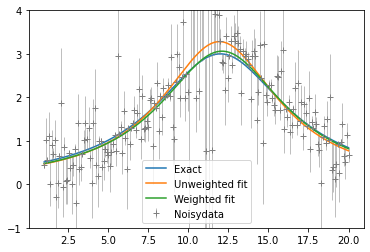

In [242]:
# eg8-curve -fit.py
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
x0, A, gamma = 12, 3, 5
n = 200
x = np.linspace(1, 20, n)
yexact = A * gamma**2 / (gamma**2 + (x-x0)**2)

# Добавление некоторого шума с использованием sigma с коэффициентом 0.5 вне особенно
# зашумленной области в окрестности x0, где значение sigma равно 3.
sigma = np.ones(n)*0.5
sigma[np.abs(x-x0+1)<1] = 3
noise = np.random.randn(n) * sigma
y = yexact + noise
def f(x, x0, A, gamma):
    """ The Lorentzian entered at x0 with amplitude A and HWHM gamma. """
    """ Функция кривой распределения Лоренца в точке x0 с амплитудой A и HWHM gamma. """
    return A *gamma**2 / (gamma**2 + (x-x0)**2)

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

# Подгонка без весовых коэффициентов.
p0 = 10, 4, 2
popt, pcov = curve_fit(f, x, y, p0)
yfit = f(x, *popt)
print('Unweighted fit parameters:', popt)
print('Covariance matrix:'); print(pcov)
print('rms error in fit:', rms(yexact , yfit))
print()
# Подгонка с весовыми коэффициентами.
popt2, pcov2 = curve_fit(f, x, y, p0, sigma=sigma, absolute_sigma=True)
yfit2 = f(x, *popt2)
print('Weighted fit parameters:', popt2)
print('Covariance matrix:'); print(pcov2)
print('rms error in fit:', rms(yexact , yfit2))
plt.plot(x, yexact, label='Exact')
plt.errorbar(x, y, yerr=noise, elinewidth=0.5, c='0.5', marker='+', lw=0, label='Noisydata')
plt.plot(x, yfit, label='Unweighted fit')
plt.plot(x, yfit2, label='Weighted fit')
plt.ylim(-1, 4)
plt.legend(loc='lower center')
plt.show()


**Рис. 4**. Пример подгонки методом наименьших квадратов с использованием метода
```scipy.optimize.curve_fit```

Как можно видеть на рис.  4, подгонка без весовых коэффициентов искажается в зашумленной области. При подгонке с весовыми коэффициентами данным в этой области присваивается меньший вес, поэтому параметры получаются более близкими к истинным значениям, следовательно, улучшается качество подгонки в целом. Ниже приведен вывод результата:

## Численные методы решения уравнений

Модуль ```scipy.optimize``` предоставляет несколько методов для вычисления корней одномерных и многомерных функций. Здесь рассматриваются только алгоритмы, относящиеся к функциям одной переменной: ```brentq```, ```brenth```, ```ridder``` и ```bisect```. Для каждого из этих методов требуется непрерывная функция ```f(x)``` и пара
чисел, определяющая ограничивающий интервал для поиска корней, т. е. значения ```a``` и ```b```, такие, что корень находится в интервале ```[a, b]``` и ```sgn[f(a)] = −sgn[f(b)]```.

Подробные описания алгоритмов, используемых в этих методах поиска корней
уравнений, можно найти в обычных книгах по численным методам анализа.
В общем случае основным методом поиска корней удобной для анализа
(аналитической) функции является ```scipy.optimize.brentq```, реализующий версию метода Брента с обратной квадратичной экстраполяцией (```scipy.optimize.brenth``` –похожий алгоритм, но с гиперболической экстраполяцией). В качеств примера рассмотрим следующую функцию в интервале ```−1 ≤ x ≤ 1```:

```f(x) = 1/5 + x cos(3/x)```

График этой функции (см. рис.  5) позволяет предположить, что корень
находится между −0.7 и −0.5.



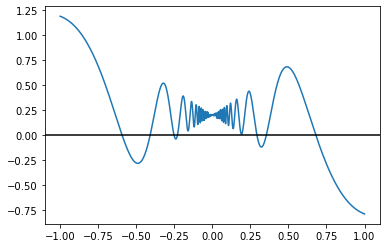

-0.5933306271014237

In [243]:
f = lambda x: 0.2 + x*np.cos(3/x)
x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))
plt.axhline(0, color='k')
plt.show()
from scipy.optimize import brentq
brentq(f, -0.7, -0.5)


**Рис. 5**. Функция f(x) = 1/5 + x cos(3/x) и ее корни


Алгоритм поиска корней,известный как метод Риддерса,реализован в функции ```scipy.optimize.ridder```. Более медленный, но весьма надежный (для непрерывных функций) метод бисекции представлен как ```scipy.optimize.bisect```.
Поиск корней (решение уравнений) с использованием алгоритма Ньютона–Рафсона может быть очень быстрым (квадратическим) для многих непрерывных функций, для которых можно вычислить первую производную ```f'(x)```. Если можно написать исходный код для аналитического выражения первой производной ```f'(x)```, то это закодированное выражение передается в метод ```scipy.optimize.newton``` как аргумент ```fprime``` вместе с  начальной точкой ```x0```, которая (в  общем случае) должна располагаться как можно ближе к  вычисляемому
корню. Нет необходимости определять ограничивающий интервал для корня.
Если первую производную ```f'(x)``` передать невозможно, то метод ```newton``` использует метод секущих. Если выбрано удачное положение, в котором можно определить вторую производную f'(x) и передать ее в аргументе fprime2 так же, как
и первую производную, то вместо алгоритма Ньютона–Рафсона используется
метод Галлея (который сходится даже быстрее, чем основной алгоритм Ньютона–Рафсона).
Следует отметить, что условием остановки при выполнении итерационного алгоритма, используемого методом ```newton```, является размер шага, поэтому
нет полной уверенности в том, что будет обеспечена сходимость к требуемому
корню: результат должен быть проверен вычислением функции при возвращенном значении для проверки его близости к нулю.

**Пример 3**. В экологии уравнение Эйлера–Лотки описывает рост населения как
функцию ```P(x)``` – долю людей, доживших до возраста ```x```, и ```m(x)``` – средний коэффициент рождаемости для женщин, живущих в рассматриваемый интервал времени:

![](images/image4.png)

где ```α``` и ```β``` – границы репродуктивного возраста, определяющие дискретный коэффициент роста ```λ = er```.

Значение ```r = ln λ``` известно как истинный коэффициент
естественного прироста населения Лотки.
В статье Лесли и Рэнсона описаны измерения ```P(x)``` и ```m(x)``` для мышей-полевок (Microtus agrestis) с  интервалами времени, равными восьми неделям.

Данные измерений приведены в табл. 1.

**Таблица 3**. Данные о популяции мышей-полевок, собранные Лесли и Рэнсоном

|x,недели|m(x)|P(x)|
|:-------|:---|:---|
|8|0.6504|0.83349|
|16|2.3939|0.73132|
|24|2.9727|0.58809|
|32|2.4662|0.43343|
|40|1.7043|0.29277|
|48|1.0815|0.18126|
|56|0.6683|0.10285|
|64|0.4286|0.05348|
|72|0.3000|0.02549|

Сумма ![](images/image5.png) позволяет получить отношение между общим
количеством женщин, рождающихся в последующих поколениях: население растет, если ```R0 > 1```, а r определяет скорость этого роста. Чтобы найти ```r```, Лесли
и Рэнсон использовали приближенный численный метод. Код в листинге 7
определяет ```r``` с помощью прямого поиска действительного корня уравнения
Лотки–Эйлера (можно показать, что здесь существует только один корень).

**Листинг 3**. Решение уравнения Эйлера–Лотки

In [244]:
# eg8-euler-lotka.py
import numpy as np
from scipy.optimize import brentq
# Данные из таблицы 6, приведенной в статье:
# P. H. Leslie and R. M. Ranson, J. Anim. Ecol. 9, 27 (1940).
x = np.linspace(8, 72, 9)
m = np.array( [0.6504, 2.3939, 2.9727, 2.4662, 1.7043, 1.0815, 0.6683, 0.4286, 0.3000] )
P = np.array( [0.83349, 0.73132, 0.58809, 0.43343, 0.29277,
 0.18126, 0.10285, 0.05348, 0.02549] )
# Вычисление произведения последовательности f и R0, отношение между количеством
# рождений женщин в последующих поколениях.
f = P * m
R0 = np.sum(f)
if R0 > 1:
    msg = 'R0 > 1: population grows'
else:
    msg = 'Population does not grow'
# Уравнение Эйлера-Лотки: поиск единственного действительного корня в r.
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1
# Локализация корня и решение с использованием метода scipy.optimize.brentq.
a, b = 0, 10
r = brentq(func, a, b)
print('R0 = {:.3f} ({})'.format(R0, msg))
print('r = {:.5f} (lambda = {:.5f})'.format(r, np.exp(r)))


R0 = 5.904 (R0 > 1: population grows)
r = 0.08742 (lambda = 1.09135)


Это значение r можно сравнить с приближенным значением, полученным
Лесли и Рэнсоном и сопровожденным их комментарием:
    
    «Искомый корень равен 0.087703, он немного превышает оценку значения r, к  которому стремится эта последовательность. Это значение находится между 0.0861 (третья степень приближения) и 0.0877, но ближе к последнему, чем к  первому. Вероятно, погрешность возникла в  последнем десятичном знаке».

**Пример 4**. Метод Ньютона–Рафсона для поиска корней функции принимает
начальную предпосылку для корня ```x0``` и выполняет процедуру поиска посредством постепенно улучшаемых приближений по формуле:

![](images/image6.png)

Таким образом, на каждой итерации корень приближенно вычисляется как ```xn+1```, координата по оси ```x``` точки пересечения касательной к графику функции в точке ```f(xn)```. Если алгоритм применяется к функциям комплексной переменной ```z```, то метод можно использовать для создания фракталов любопытной формы, рассматривая сходимость корня к  множеству чисел на комплексной плоскости. Код в листинге 9 генерирует изображение фрактала (рис. 6),
выделяя цветом соответствующие точки на комплексной плоскости, используемые как начальные предпосылки при поиске корня.

**Листинг 4**. Создание изображения фрактала Ньютона

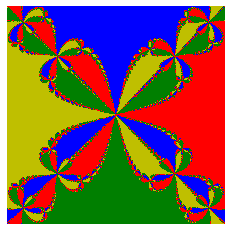

In [245]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Список цветов для обозначения различных корней.
colors = ['b', 'r', 'g', 'y']
TOL = 1.e-8
def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).
    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.
    Метод Ньютона-Рафсона, применяемый к функции f(z).
    Возвращает найденный корень, начиная с исходной предпосылки z0, или False,
    если не достигнута сходимость в пределах допустимой погрешности TOL за MAX_IT итераций.
    """
    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).
    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.
    Создание изображения фрактала Ньютона по найденным корням функции f(z).
    Для изображения фрактала используется область комплексной плоскости
    (xmin, xmax, ymin, ymax), где z = x + iy с дискретизацией по n значениям
    на каждой оси.
    """
    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.
        If r is not in roots, append it to the list.
        Определение индекса r в списке корней.
        Если r нет в списке корней, то добавить его в этот список.
        """
        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Использование "непрерывной" цветовой схемы, если найдено слишком много корней.
        cmap = 'hsv'
    else:
        # Использование списка цветов для цветовой схемы: по одному цвету для каждого корня.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')

    plt.axis('off')
    plt.show()
    
f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=500)



**Рис. 6**. Фрактал Ньютона для функции ```f(z) = z^4− 1```. Замысловатые самоподобные структуры наблюдаются для начальных предпосылок ```z0``` в интервале между корнями ```(−1, 1, −i, i)```

## Упражнения

1. Использовать метод ```scipy.optimize.brentq``` для поиска решений уравнения

![](images/image7.png)

In [19]:
import numpy as np
from scipy.optimize import brent

f = lambda x: x + 1 + (x - 3)**-3
brentq(f, -2, -0.5), brentq(f, 0, 2.99)

(-0.984188231211512, 2.3303684533047426)

2. Найти все корни функции

![](images/image8.png)

используя: а) метод ```scipy.optimize.brentq```, б) метод ```scipy.optimize.newton```.

In [20]:
import numpy as np
from scipy.optimize import brentq, newton

f = lambda x: 0.2 + x*np.cos(3/x)

x, dx = np.linspace(-1, 1, 1000, retstep=True)
lower_bounds = x[np.sign(f(x[1:])) != np.sign(f(x[:-1]))]

brent_roots = np.array([brentq(f, a, a+dx) for a in lower_bounds])

fp = lambda x: np.cos(3/x) + 3/x * np.sin(3/x)
newton_roots = np.array([newton(f, a, fp) for a in lower_bounds])
print('Roots of f(x) = x.cos(3/x):')
print('{:11s} {:11s}'. format('Brent', 'Newton'))
r = np.vstack((brent_roots, newton_roots)).T

for br, nr in r:
    print('{:11.8f} {:11.8f}'.format(br, nr))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 999